In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

LETTERS = 'abcdefg'

def simulate_buses(gamma, S, num_buses=2, initial_headway=0, burnin=900, record=100):
    """
    gamma (float): Loading parameter
    S (list): Speedup parameters for each bus [S1, S2, ...]
    num_buses (int): Number of buses
    initial_headway (float): Initial dimensionless headway
    burnin (int): Number of initial trips to discard
    record (int): Number of trips to record after burnin
    
    Returns:
    dict: Recorded headways and tour times for each bus
    """
    last_arrival_time = -initial_headway
    events = []
    next_trip = [0] * num_buses
    bus_arrivals = [[] for _ in range(num_buses)]

    for i in range(num_buses):
        arrival_time = i * initial_headway
        heapq.heappush(events, (arrival_time, i, next_trip[i]))
        next_trip[i] += 1

    recorded_data = {
        'headways': [[] for _ in range(num_buses)],
        'tour_times': [[] for _ in range(num_buses)]
    }

    while any(len(arr) < burnin + record for arr in bus_arrivals):
        time, bus_id, trip_idx = heapq.heappop(events)

        headway = time - last_arrival_time
        last_arrival_time = time

        if trip_idx >= burnin:
            recorded_idx = trip_idx - burnin
            if recorded_idx < record:
                recorded_data['headways'][bus_id].append(headway)

        next_time = time + gamma * headway + 1/(1 + S[bus_id] * headway)
        tour_time = next_time - time

        if trip_idx >= burnin:
            recorded_idx = trip_idx - burnin
            if recorded_idx < record:
                recorded_data['tour_times'][bus_id].append(tour_time)

        heapq.heappush(events, (next_time, bus_id, next_trip[bus_id]))
        next_trip[bus_id] += 1
        bus_arrivals[bus_id].append(time)

    return recorded_data

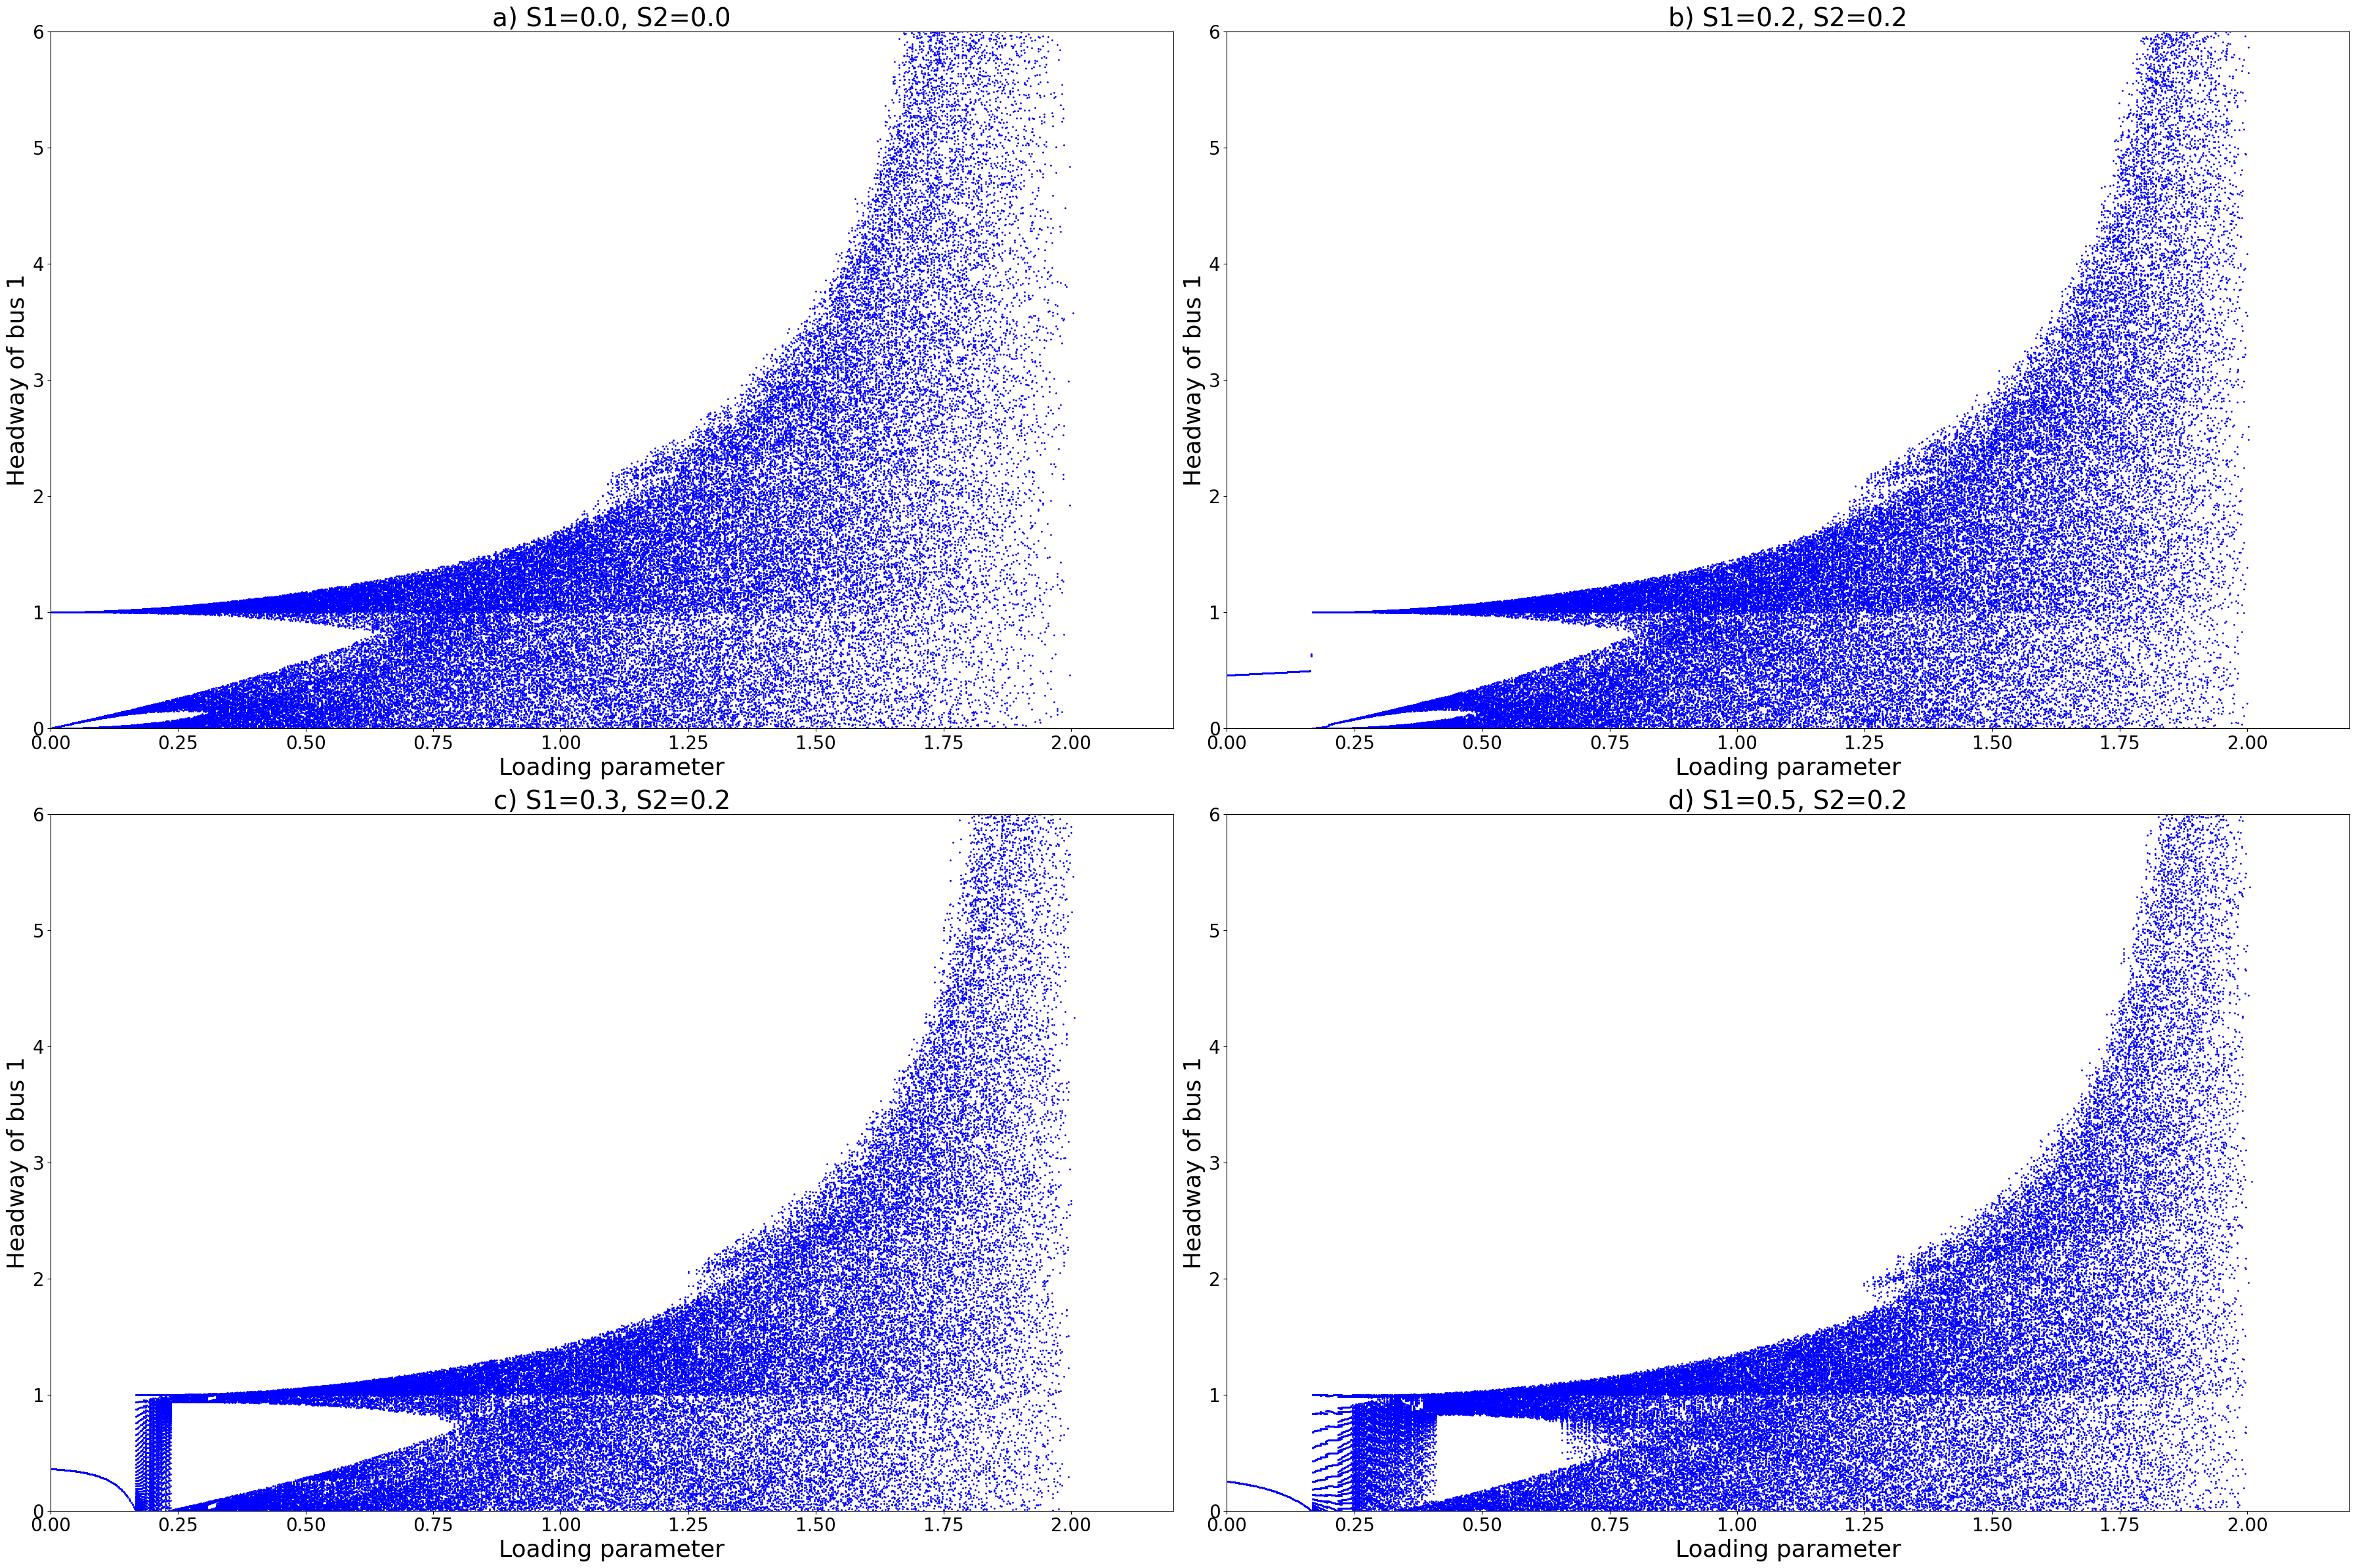

In [2]:
# Fig. 2
cases_headway = [
    (0.0, 0.0),
    (0.2, 0.2),
    (0.3, 0.2),
    (0.5, 0.2)
]

gamma_start_headway = 0.0
gamma_end_headway = 2.2
gamma_num_headway = 1000

S_values = cases_headway
gamma_range = np.linspace(gamma_start_headway, gamma_end_headway, gamma_num_headway)
ylim = 6
plt.figure(figsize=(36, 24))

for i, (S1, S2) in enumerate(S_values):
    plt.subplot(2, 2, i+1)

    for gamma in gamma_range:
        data = simulate_buses(gamma, [S1, S2])
        headways = data['headways'][0]

        plt.scatter([gamma]*len(headways), headways, s=1, c='blue')

    plt.title(f'{LETTERS[i]}) S1={S1}, S2={S2}', fontsize=28)
    plt.xlabel('Loading parameter', fontsize=26)
    plt.ylabel('Headway of bus 1', fontsize=26)
    plt.ylim(0, ylim)
    plt.xlim(gamma_range[0], gamma_range[-1])
    plt.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.show()

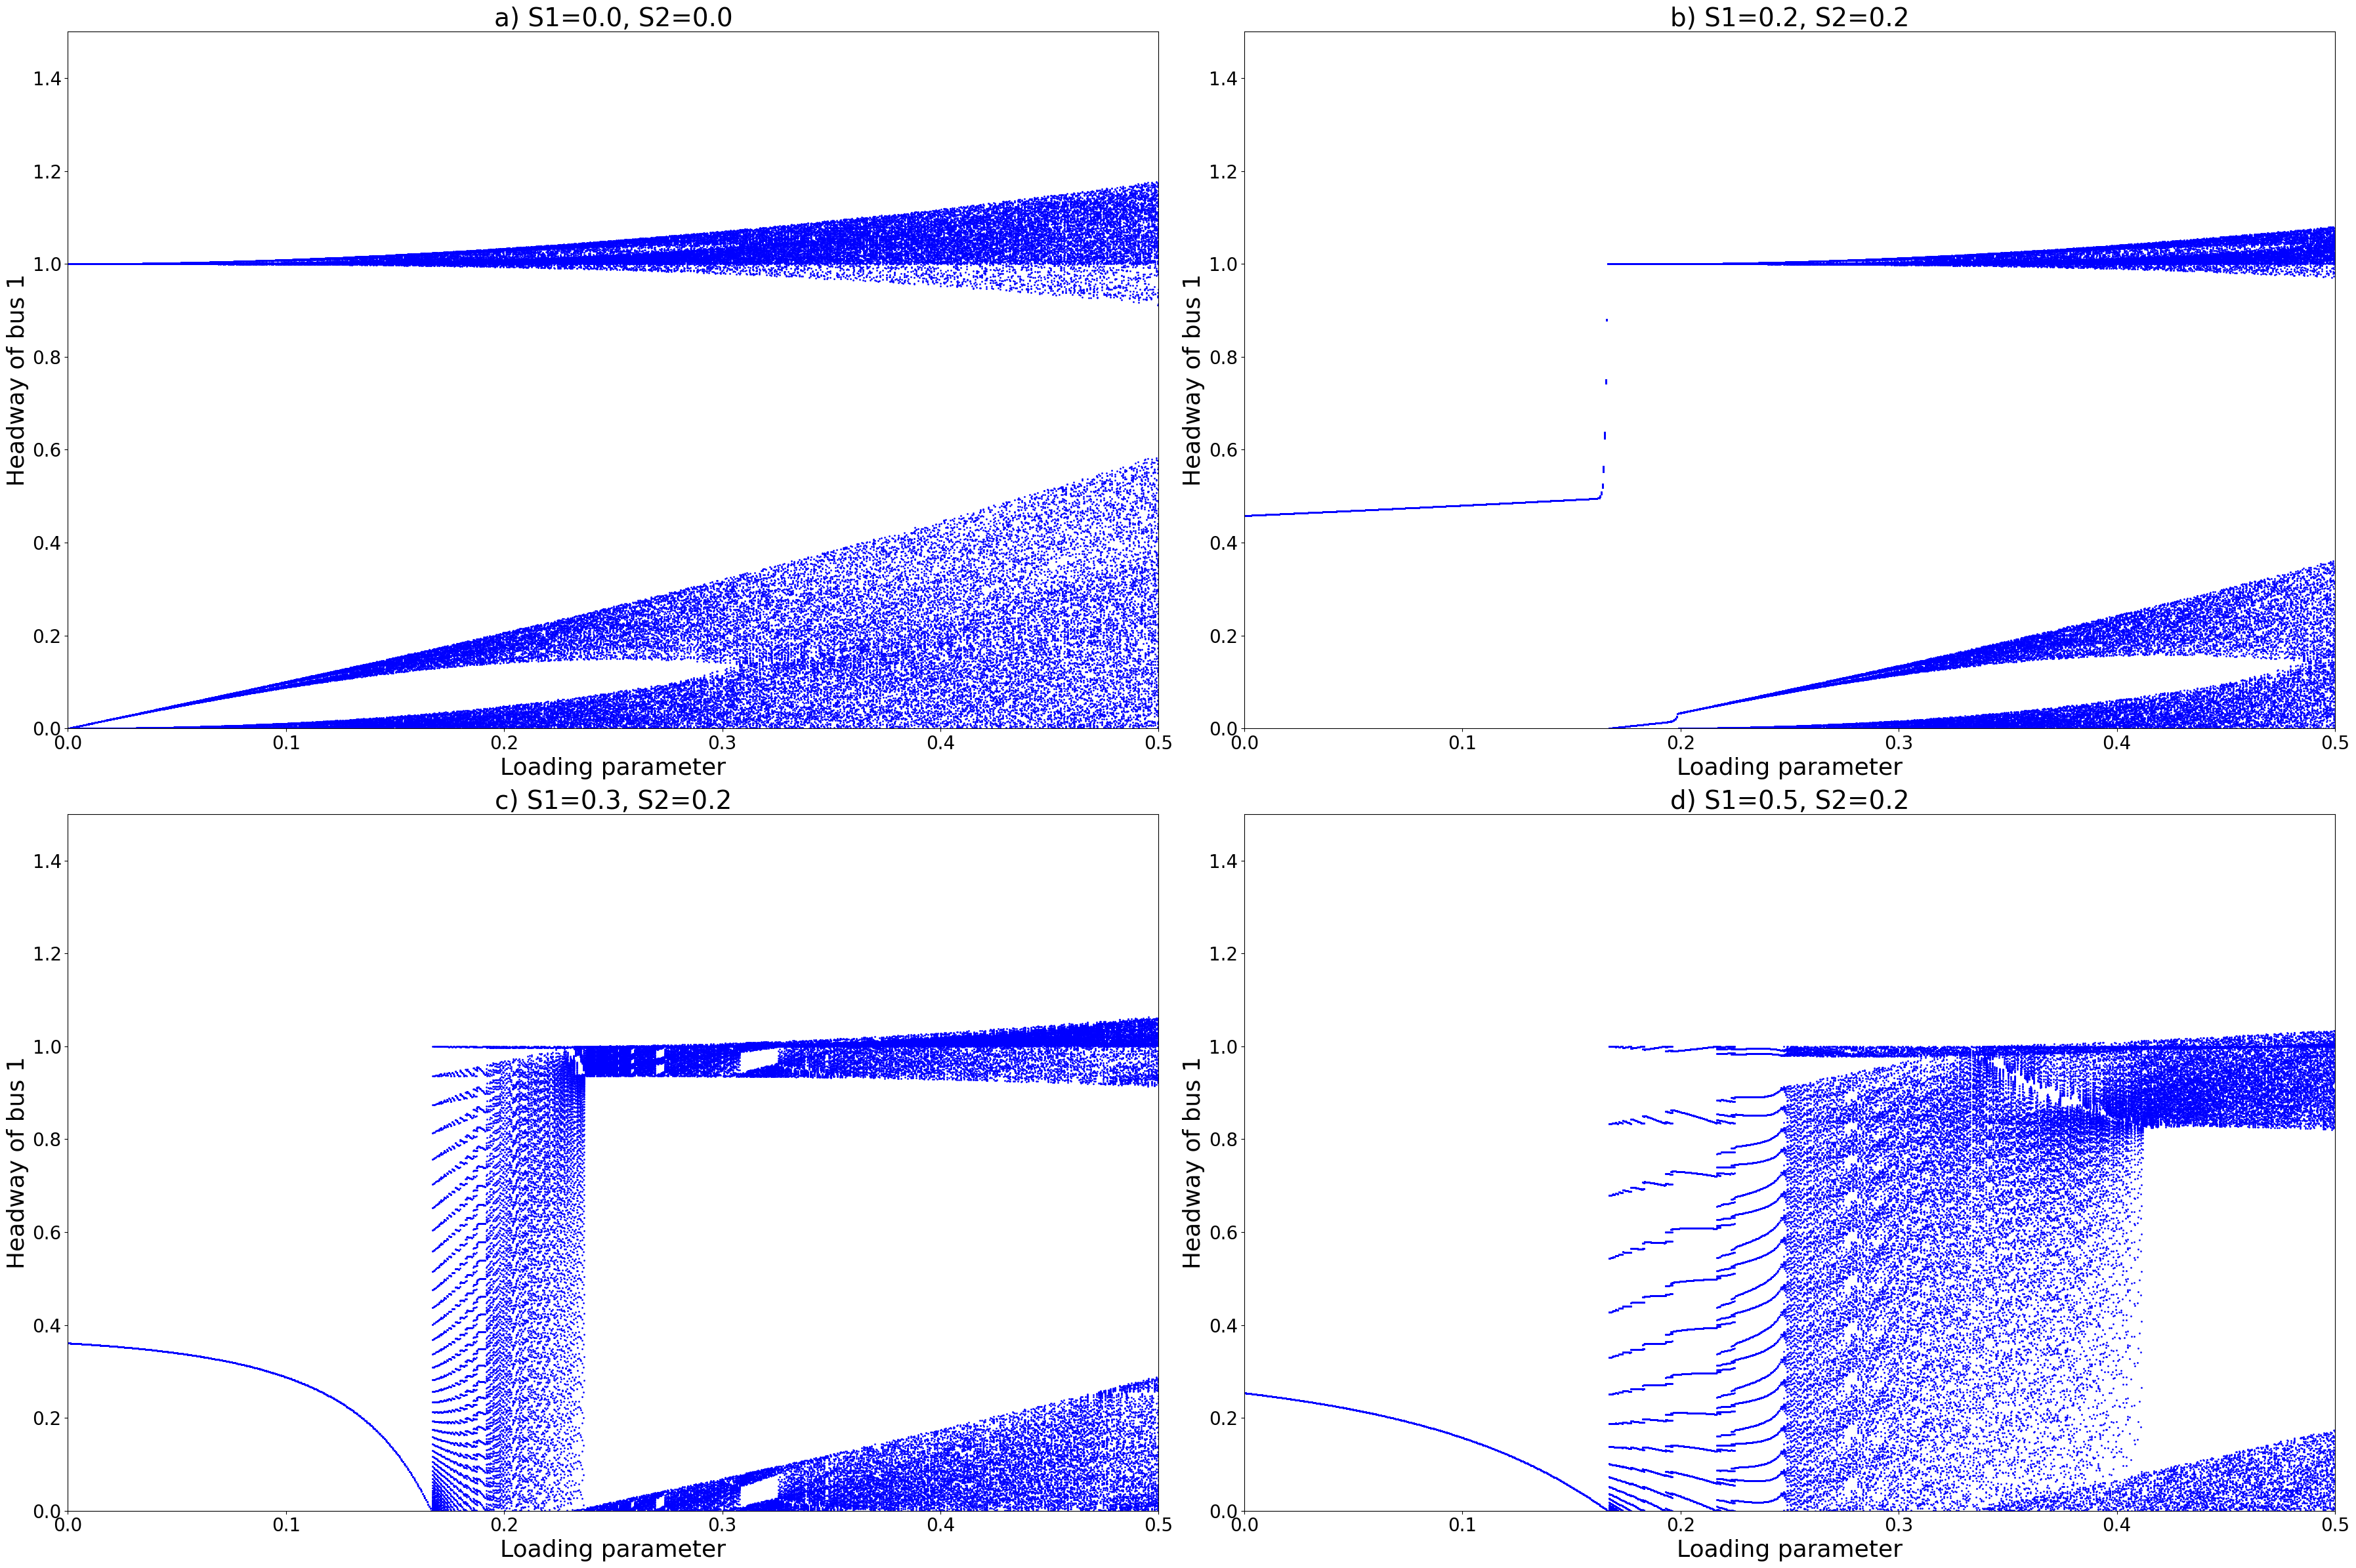

In [3]:
# Fig. 3
gamma_start_headway_zoom = 0.0
gamma_end_headway_zoom = 0.5
gamma_num_headway_zoom = 1000

S_values = cases_headway
gamma_range = np.linspace(gamma_start_headway_zoom, gamma_end_headway_zoom, gamma_num_headway_zoom)
ylim = 1.5
plt.figure(figsize=(36, 24))

for i, (S1, S2) in enumerate(S_values):
    plt.subplot(2, 2, i+1)

    for gamma in gamma_range:
        data = simulate_buses(gamma, [S1, S2])
        headways = data['headways'][0]

        plt.scatter([gamma]*len(headways), headways, s=1, c='blue')

    plt.title(f'{LETTERS[i]}) S1={S1}, S2={S2}', fontsize=28)
    plt.xlabel('Loading parameter', fontsize=26)
    plt.ylabel('Headway of bus 1', fontsize=26)
    plt.ylim(0, ylim)
    plt.xlim(gamma_range[0], gamma_range[-1])
    plt.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.show()

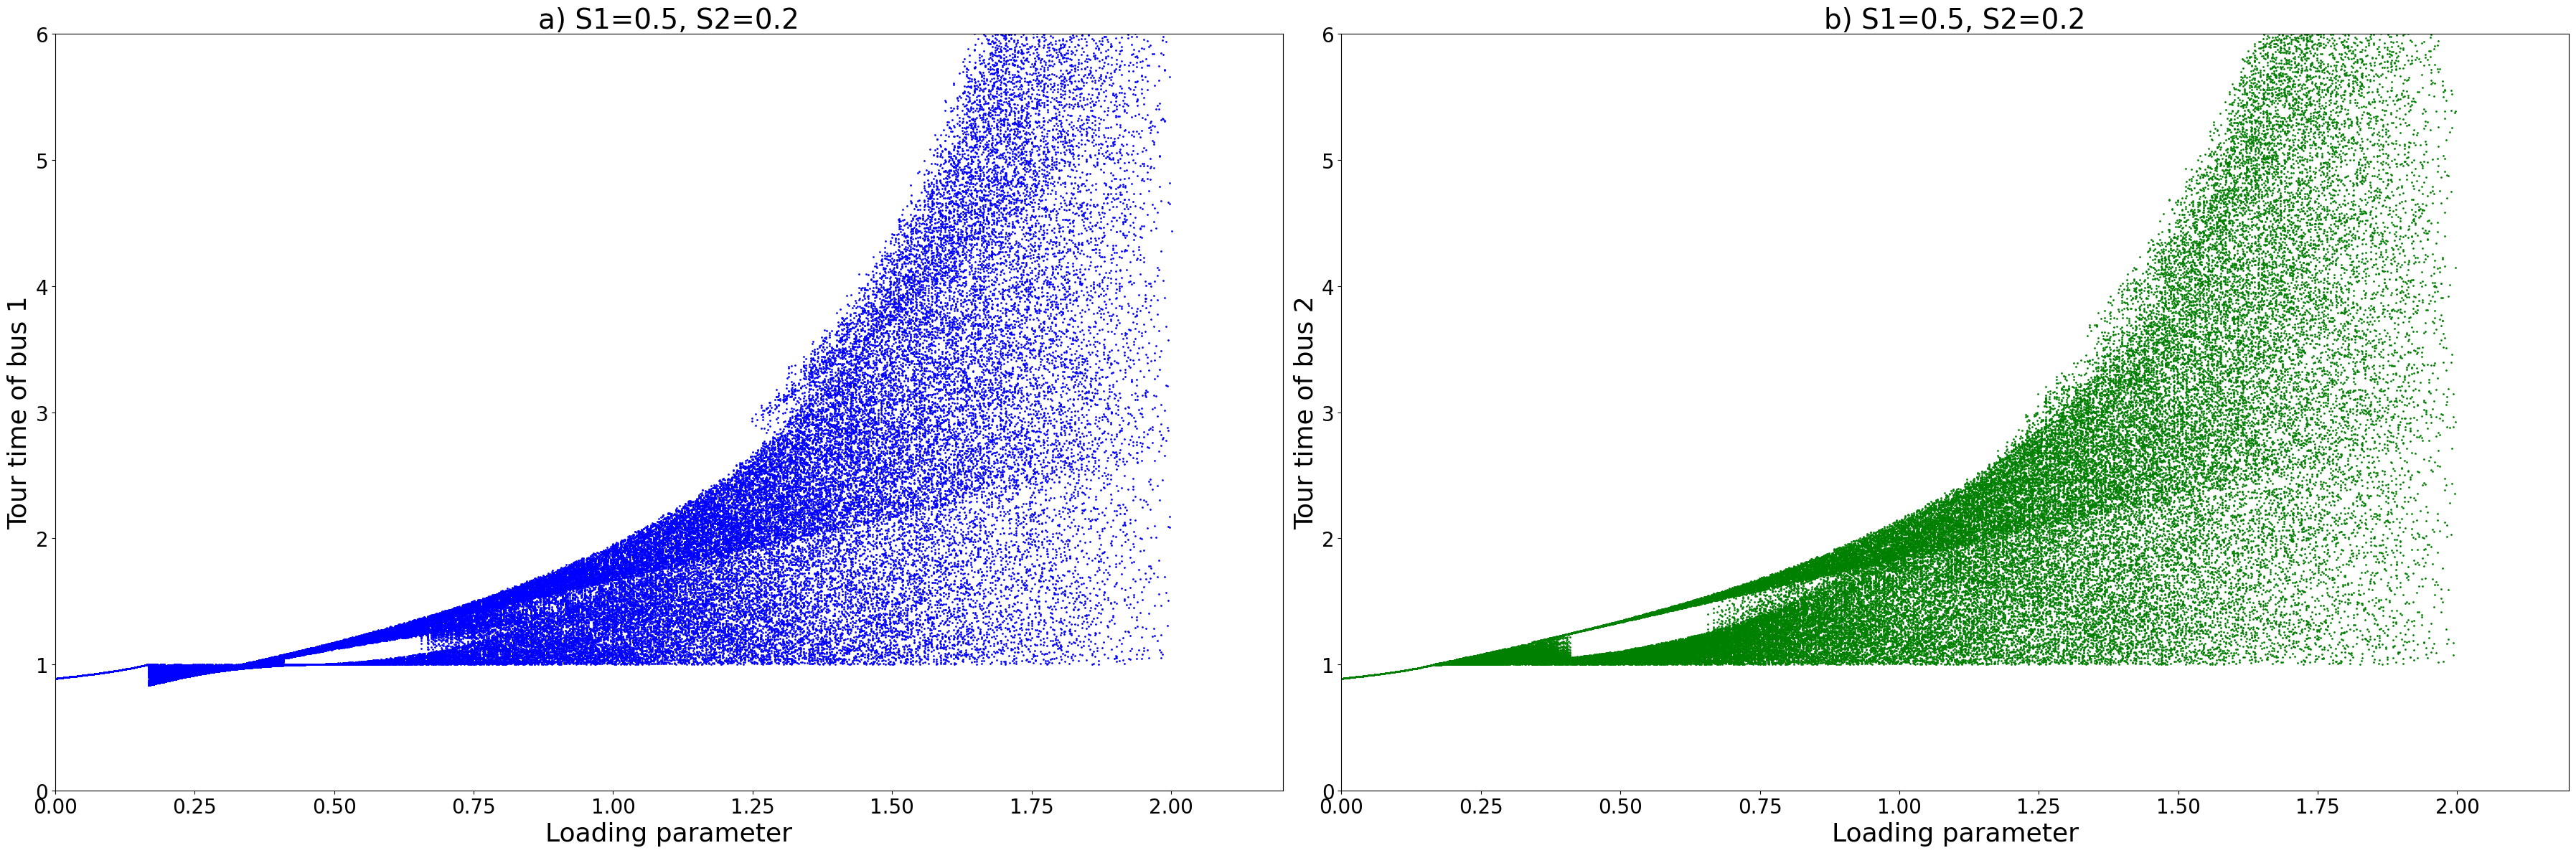

In [4]:
# Fig. 4
S1_fig45 = 0.5
S2_fig45 = 0.2

gamma_values_fig5 = np.linspace(0.0, 2.2, 1000)
record_fig5 = 100

S1 = S1_fig45
S2 = S2_fig45
gamma_values = gamma_values_fig5
record = record_fig5

all_gamma = []
all_tour_times_bus1 = []
all_tour_times_bus2 = []

for i, gamma in enumerate(gamma_values):
    data = simulate_buses(gamma, [S1, S2])
    all_gamma.extend([gamma] * record)
    all_tour_times_bus1.extend(data['tour_times'][0])
    all_tour_times_bus2.extend(data['tour_times'][1])

plt.figure(figsize=(36, 12))

plt.subplot(1, 2, 1)
plt.scatter(all_gamma, all_tour_times_bus1, s=1, c='blue')
plt.title(f'a) S1={S1}, S2={S2}', fontsize=28)
plt.xlabel('Loading parameter', fontsize=26)
plt.ylabel('Tour time of bus 1', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlim(0.0, 2.2)
plt.ylim(0, 6)

plt.subplot(1, 2, 2)
plt.scatter(all_gamma, all_tour_times_bus2, s=1, c='green')
plt.title(f'b) S1={S1}, S2={S2}', fontsize=28)
plt.xlabel('Loading parameter', fontsize=26)
plt.ylabel('Tour time of bus 2', fontsize=26)
plt.xlim(0.0, 2.2)
plt.ylim(0, 6)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.show()

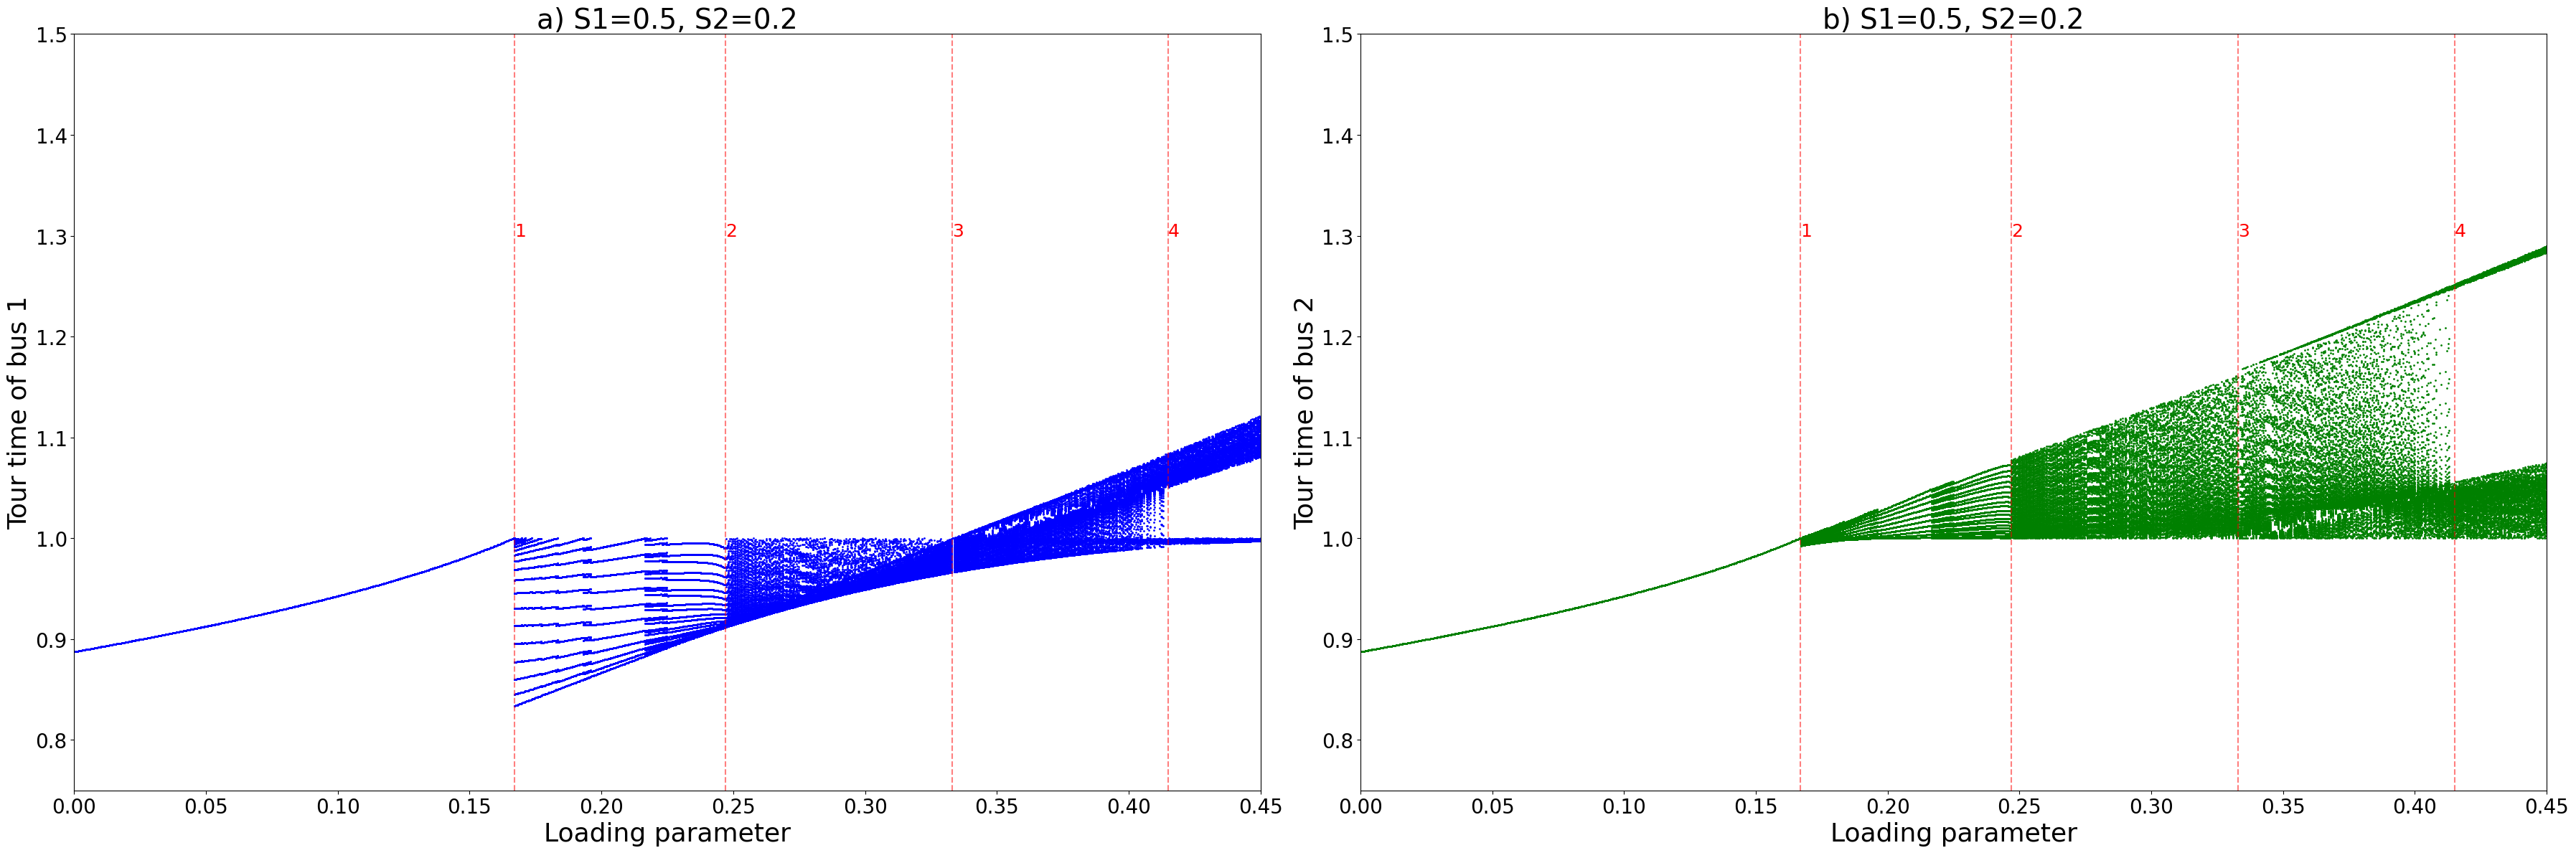

In [5]:
# Fig. 5
S1_fig45 = 0.5
S2_fig45 = 0.2

gamma_values_fig5 = np.linspace(0.0, 0.45, 1000)
record_fig5 = 100

S1 = S1_fig45
S2 = S2_fig45
gamma_values = gamma_values_fig5
record = record_fig5

all_gamma = []
all_tour_times_bus1 = []
all_tour_times_bus2 = []

for i, gamma in enumerate(gamma_values):
    data = simulate_buses(gamma, [S1, S2])
    all_gamma.extend([gamma] * record)
    all_tour_times_bus1.extend(data['tour_times'][0])
    all_tour_times_bus2.extend(data['tour_times'][1])

plt.figure(figsize=(36, 12))

plt.subplot(1, 2, 1)
plt.scatter(all_gamma, all_tour_times_bus1, s=1, c='blue')
plt.title(f'a) S1={S1}, S2={S2}', fontsize=28)
plt.xlabel('Loading parameter', fontsize=26)
plt.ylabel('Tour time of bus 1', fontsize=26)
plt.xlim(0.0, 0.45)
plt.ylim(0.75, 1.5)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.axvline(x=0.167, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=0.247, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=0.333, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=0.415, color='r', linestyle='--', alpha=0.5)
plt.text(0.167, 1.3, '1', color='red', fontsize=18)
plt.text(0.247, 1.3, '2', color='red', fontsize=18)
plt.text(0.333, 1.3, '3', color='red', fontsize=18)
plt.text(0.415, 1.3, '4', color='red', fontsize=18)

plt.subplot(1, 2, 2)
plt.scatter(all_gamma, all_tour_times_bus2, s=1, c='green')
plt.title(f'b) S1={S1}, S2={S2}', fontsize=28)
plt.xlabel('Loading parameter', fontsize=26)
plt.ylabel('Tour time of bus 2', fontsize=26)
plt.xlim(0.0, 0.45)
plt.ylim(0.75, 1.5)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.axvline(x=0.167, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=0.247, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=0.333, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=0.415, color='r', linestyle='--', alpha=0.5)
plt.text(0.167, 1.3, '1', color='red', fontsize=18)
plt.text(0.247, 1.3, '2', color='red', fontsize=18)
plt.text(0.333, 1.3, '3', color='red', fontsize=18)
plt.text(0.415, 1.3, '4', color='red', fontsize=18)

plt.tight_layout()
plt.show()

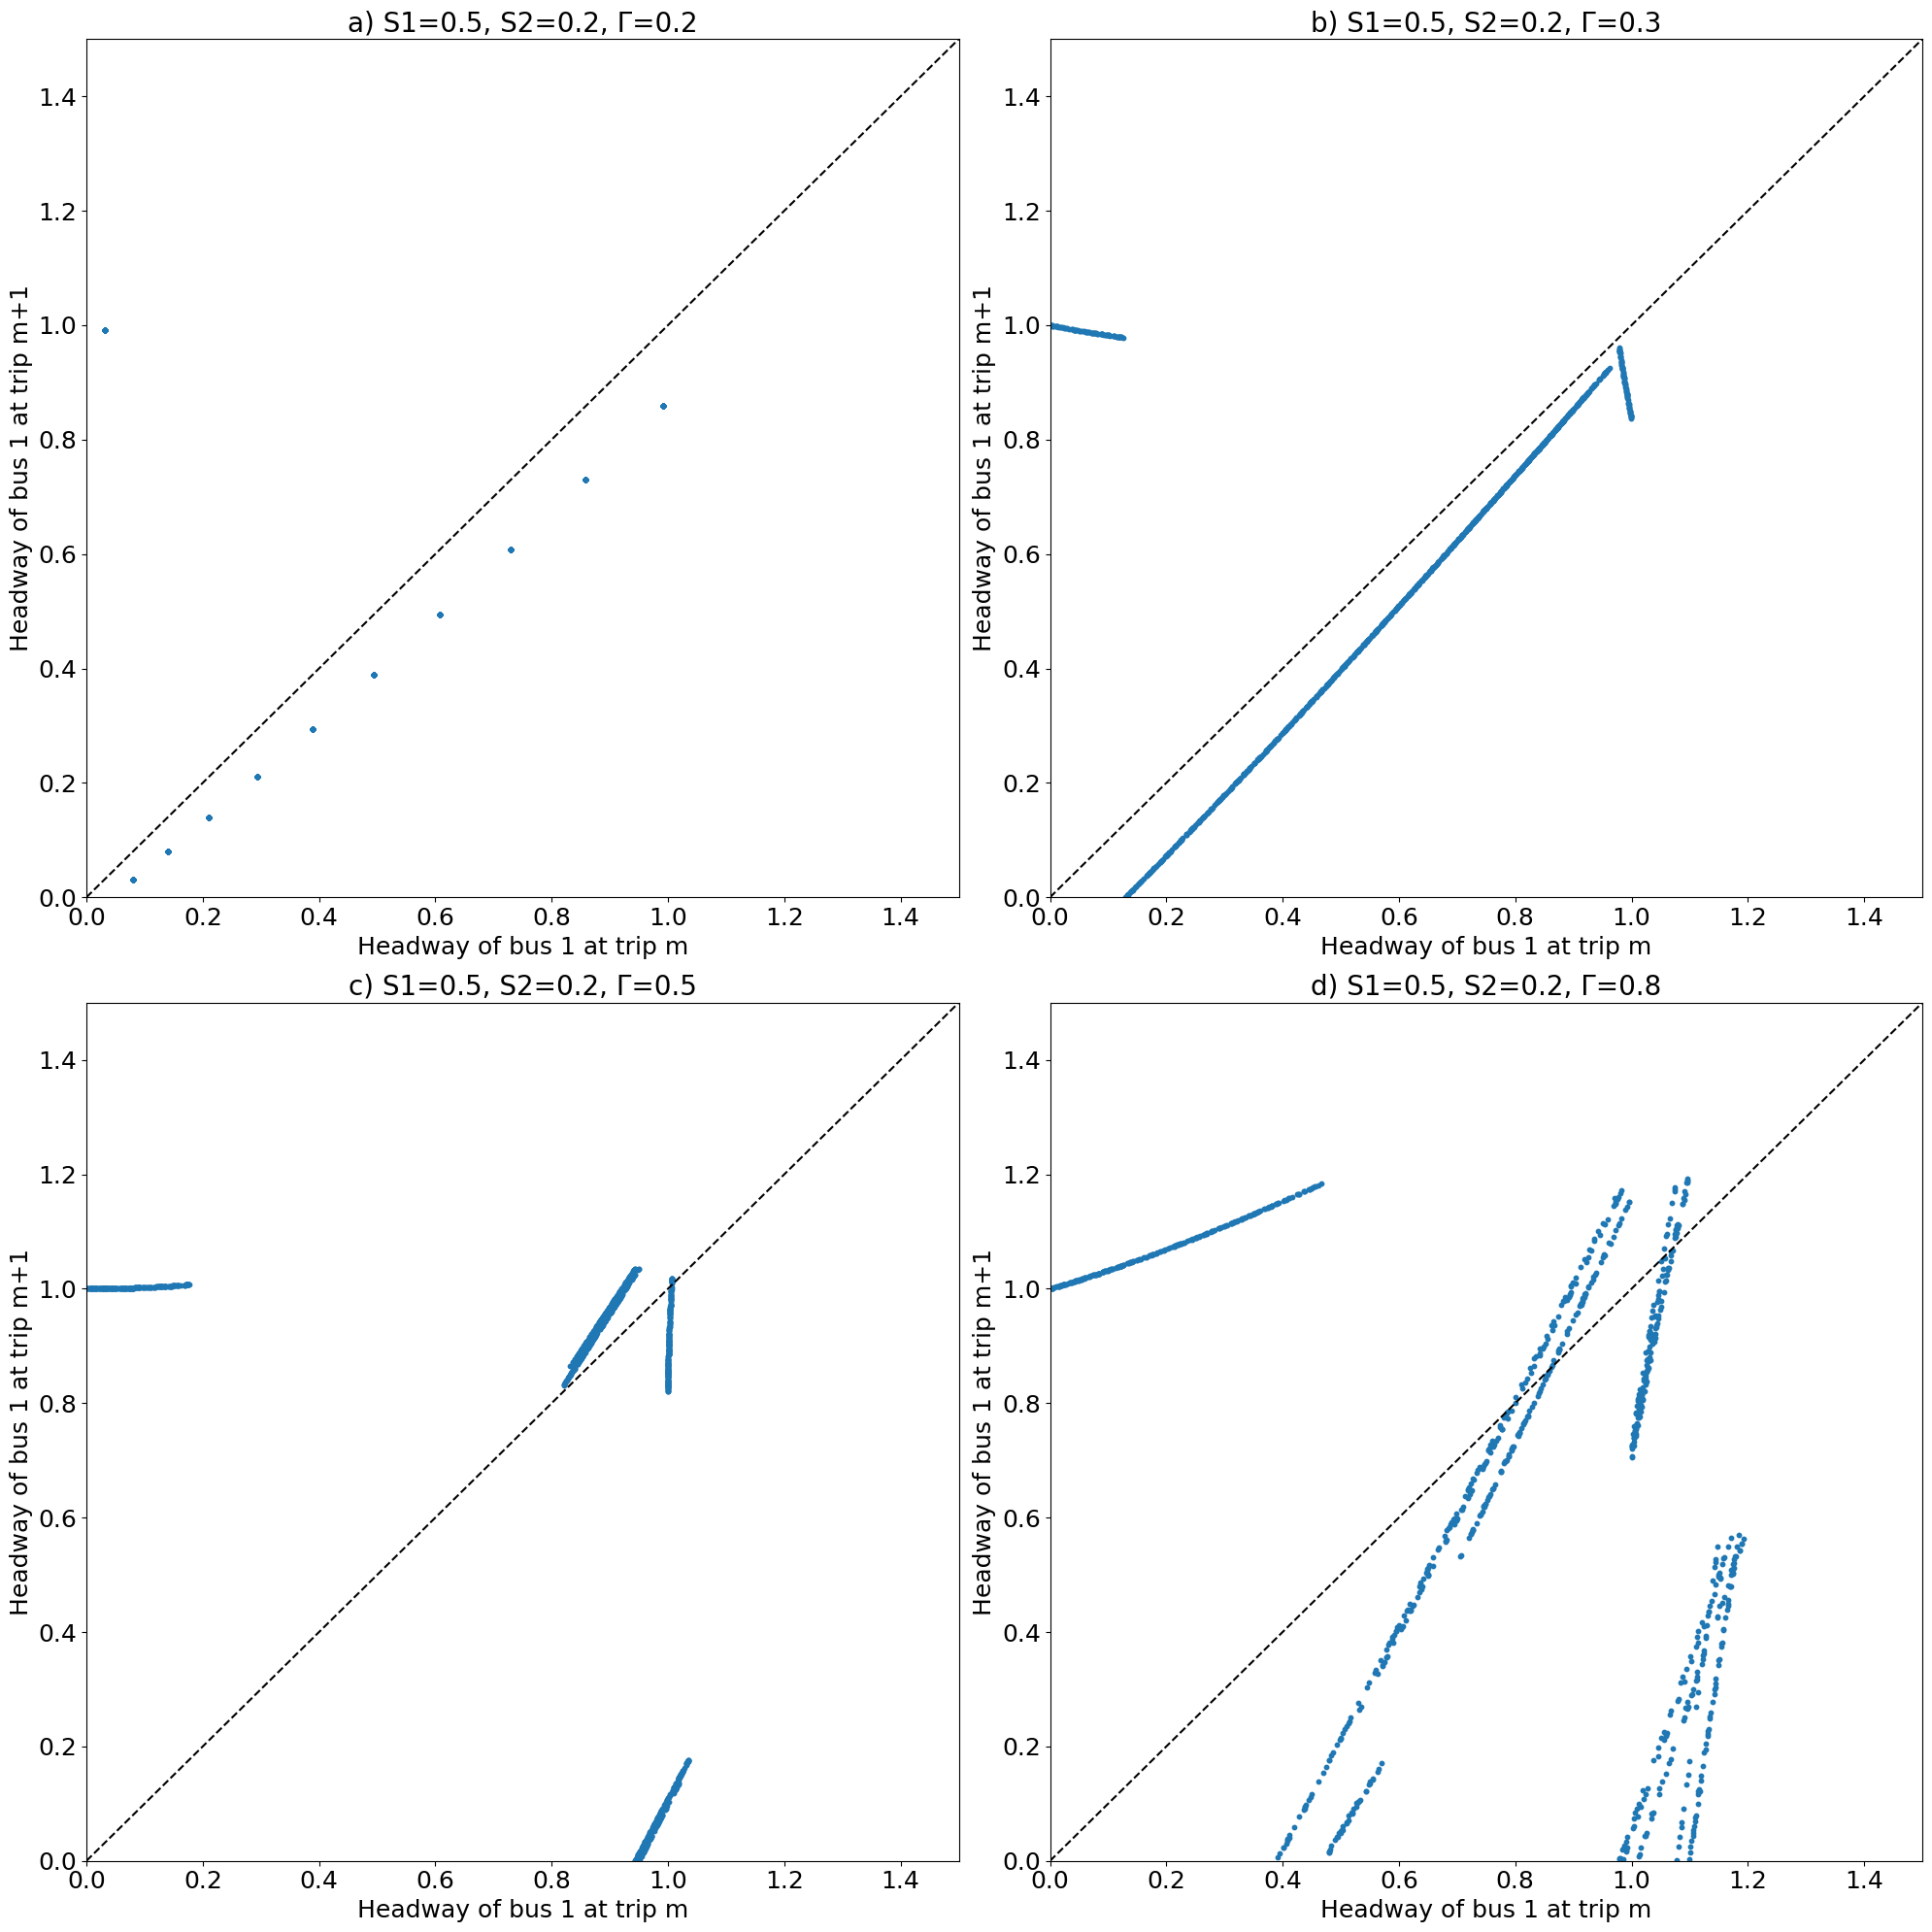

In [6]:
# Fig. 6
gamma_values = [0.2, 0.3, 0.5, 0.8]
S_rm = [0.5, 0.2]

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.flatten()

for i, gamma_rm in enumerate(gamma_values):
    ax = axes[i]

    data = simulate_buses(gamma_rm, S_rm, burnin=1000, record=1000)
    headways = data['headways'][0]

    ax.scatter(headways[:-1], headways[1:], s=10)
    ax.plot([0, 10], [0, 10], 'k--')

    ax.set_title(f'{LETTERS[i]}) S1=0.5, S2=0.2, Γ={gamma_rm}', fontsize=20)
    ax.set_xlabel('Headway of bus 1 at trip m', fontsize=18)
    ax.set_ylabel('Headway of bus 1 at trip m+1', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=18)

    ax.set_xlim(0, 1.5)
    ax.set_ylim(0, 1.5)
    
plt.tight_layout()
plt.show()

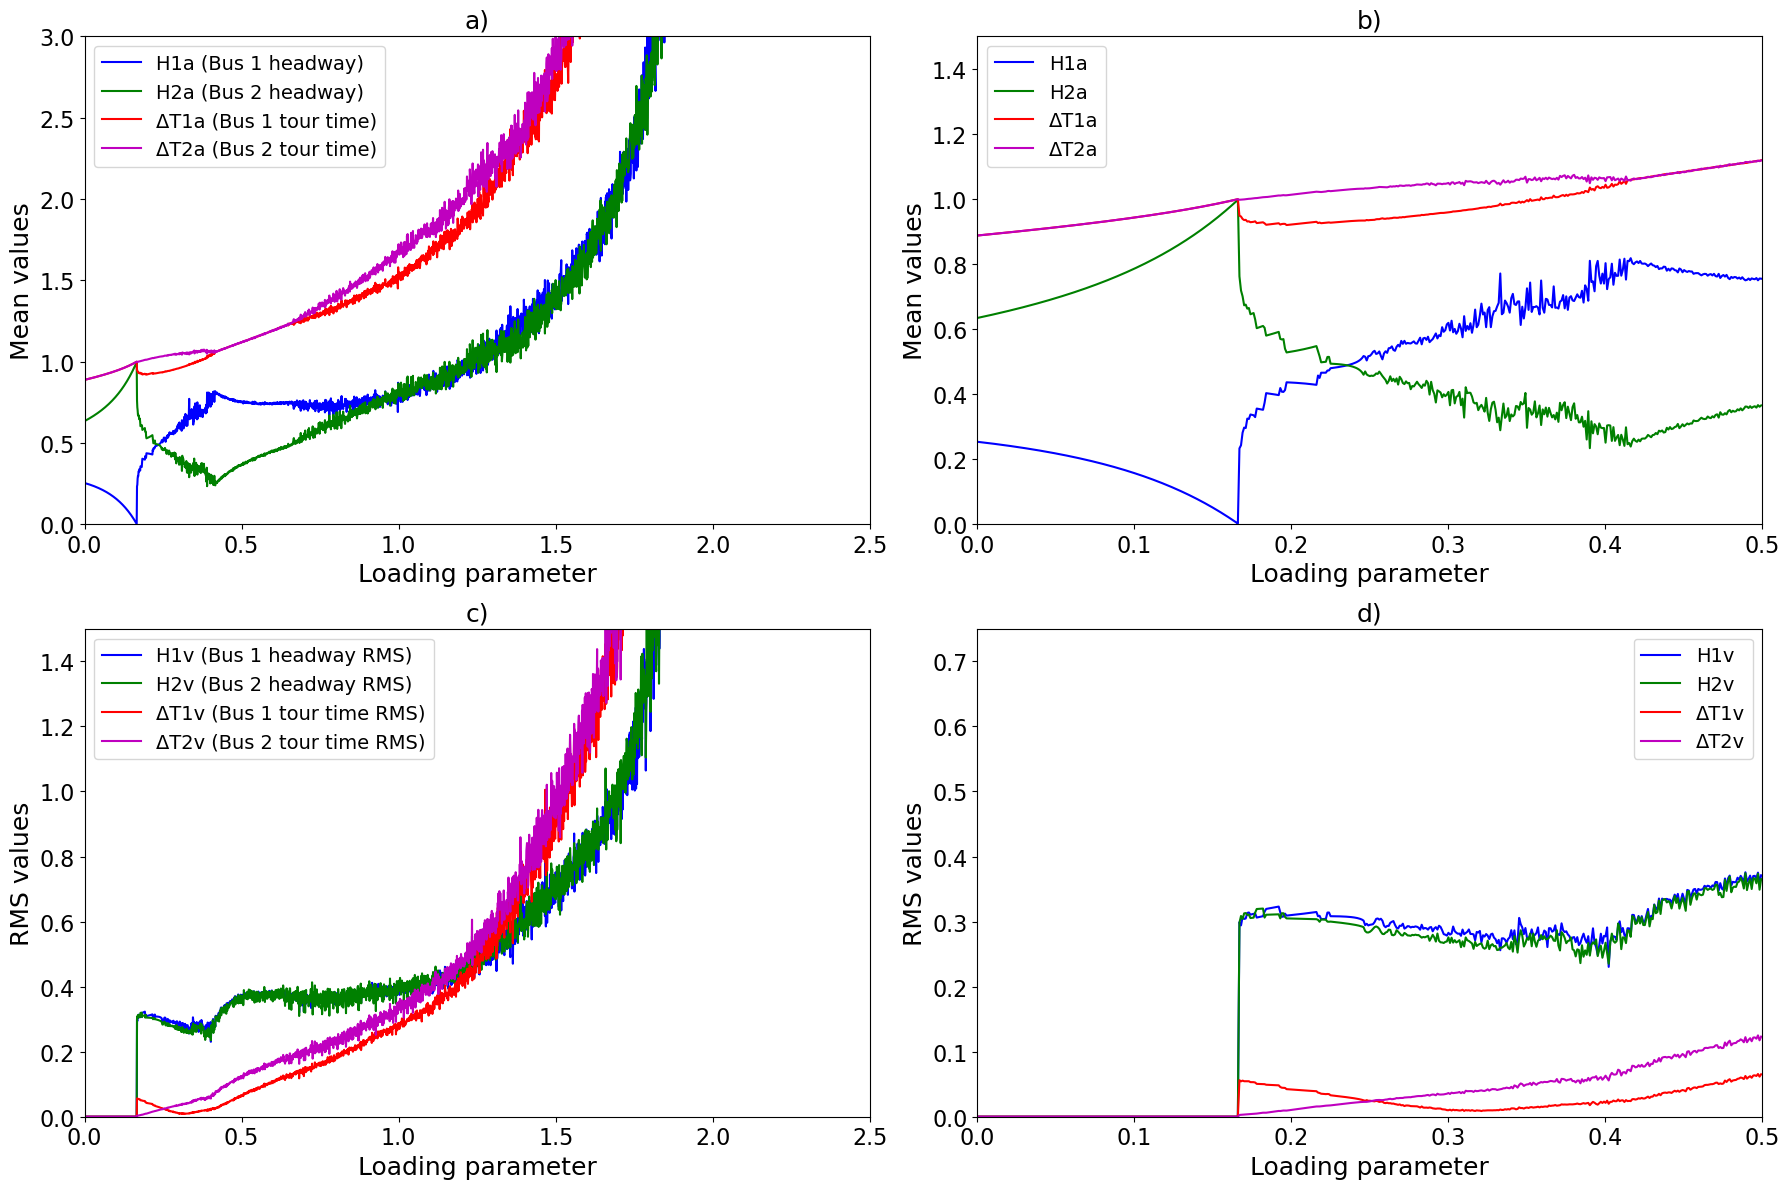

In [7]:
# Fig. 7
S1_fig7 = 0.5
S2_fig7 = 0.2
num_buses_fig7 = 2
burnin_fig7 = 900
record_fig7 = 100
gamma_values_fig7 = np.linspace(0.0, 2.5, 2500)

S1 = S1_fig7
S2 = S2_fig7
num_buses = num_buses_fig7
burnin = burnin_fig7
record = record_fig7
gamma_values = gamma_values_fig7

mean_headway1 = []
mean_headway2 = []
mean_tour1 = []
mean_tour2 = []
rms_headway1 = []
rms_headway2 = []
rms_tour1 = []
rms_tour2 = []

for i, gamma in enumerate(gamma_values):
    data = simulate_buses(gamma, [S1, S2], num_buses, burnin=burnin, record=record)

    mean_headway1.append(np.mean(data['headways'][0]))
    mean_headway2.append(np.mean(data['headways'][1]))
    mean_tour1.append(np.mean(data['tour_times'][0]))
    mean_tour2.append(np.mean(data['tour_times'][1]))

    rms_headway1.append(np.std(data['headways'][0]))
    rms_headway2.append(np.std(data['headways'][1]))
    rms_tour1.append(np.std(data['tour_times'][0]))
    rms_tour2.append(np.std(data['tour_times'][1]))

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.plot(gamma_values, mean_headway1, 'b-', label='H1a (Bus 1 headway)')
plt.plot(gamma_values, mean_headway2, 'g-', label='H2a (Bus 2 headway)')
plt.plot(gamma_values, mean_tour1, 'r-', label='ΔT1a (Bus 1 tour time)')
plt.plot(gamma_values, mean_tour2, 'm-', label='ΔT2a (Bus 2 tour time)')
plt.xlabel('Loading parameter', fontsize=18)
plt.ylabel('Mean values', fontsize=18)
plt.title('a)', fontsize=18)
plt.legend(fontsize=14)
plt.xlim(0, 2.5)
plt.ylim(0, 3)
plt.tick_params(axis='both', which='major', labelsize=16)


plt.subplot(2, 2, 2)
mask = gamma_values <= 0.5
plt.plot(gamma_values[mask], np.array(mean_headway1)[mask], 'b-', label='H1a')
plt.plot(gamma_values[mask], np.array(mean_headway2)[mask], 'g-', label='H2a')
plt.plot(gamma_values[mask], np.array(mean_tour1)[mask], 'r-', label='ΔT1a')
plt.plot(gamma_values[mask], np.array(mean_tour2)[mask], 'm-', label='ΔT2a')
plt.xlabel('Loading parameter', fontsize=18)
plt.ylabel('Mean values', fontsize=18)
plt.title('b)', fontsize=18)
plt.legend(fontsize=14)
plt.xlim(0, 0.5)
plt.ylim(0, 1.5)
plt.tick_params(axis='both', which='major', labelsize=16)


plt.subplot(2, 2, 3)
plt.plot(gamma_values, rms_headway1, 'b-', label='H1v (Bus 1 headway RMS)')
plt.plot(gamma_values, rms_headway2, 'g-', label='H2v (Bus 2 headway RMS)')
plt.plot(gamma_values, rms_tour1, 'r-', label='ΔT1v (Bus 1 tour time RMS)')
plt.plot(gamma_values, rms_tour2, 'm-', label='ΔT2v (Bus 2 tour time RMS)')
plt.xlabel('Loading parameter', fontsize=18)
plt.ylabel('RMS values', fontsize=18)
plt.title('c)', fontsize=18)
plt.legend(fontsize=14)
plt.xlim(0, 2.5)
plt.ylim(0, 1.5)
plt.tick_params(axis='both', which='major', labelsize=16)


plt.subplot(2, 2, 4)
plt.plot(gamma_values[mask], np.array(rms_headway1)[mask], 'b-', label='H1v')
plt.plot(gamma_values[mask], np.array(rms_headway2)[mask], 'g-', label='H2v')
plt.plot(gamma_values[mask], np.array(rms_tour1)[mask], 'r-', label='ΔT1v')
plt.plot(gamma_values[mask], np.array(rms_tour2)[mask], 'm-', label='ΔT2v')
plt.xlabel('Loading parameter', fontsize=18)
plt.ylabel('RMS values', fontsize=18)
plt.title('d)', fontsize=18)
plt.legend(fontsize=14)
plt.xlim(0, 0.5)
plt.ylim(0, 0.75)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()

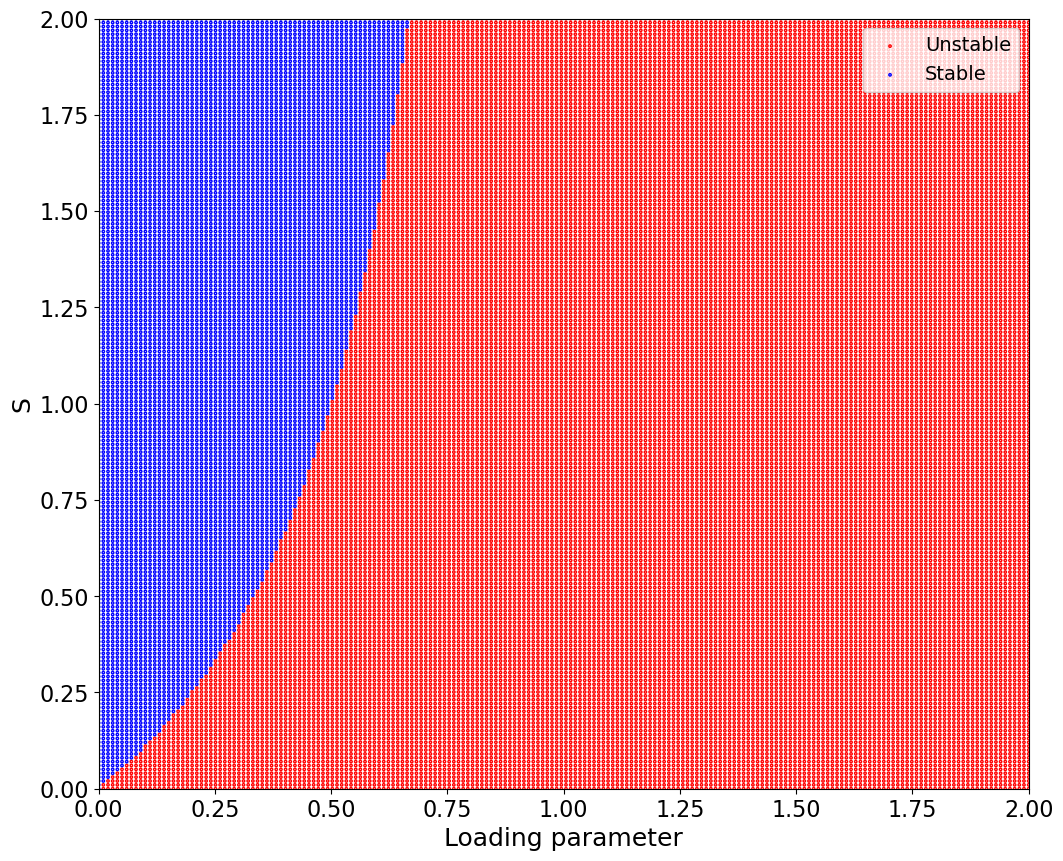

In [ ]:
# Fig. 8
s_s, s_e, g_s, g_e = 0.0, 2.0, 0.0, 2.0
s_num, g_num = 200, 200

s_range = np.linspace(s_s, s_e, s_num)
g_range = np.linspace(g_s, g_e, g_num)

transitions = []
non_transitions = []

for S_val in s_range:
    for gamma in g_range:

        data = simulate_buses(gamma, [S_val, S_val]) 
        
        if 'headways' in data and len(data['headways']) > 0 and len(data['headways'][0]) > 1:
            if np.std(data['headways'][0]) > 0.01:
                transitions.append((gamma, S_val))
            else:
                non_transitions.append((gamma, S_val))
        else:
            non_transitions.append((gamma, S_val))


plt.figure(figsize=(12, 10))

if transitions:
    plt.scatter(*zip(*transitions), edgecolors='red', facecolors='none', s=3, label='Unstable')

if non_transitions:
    plt.scatter(*zip(*non_transitions), edgecolors='blue', facecolors='none', s=3, label='Stable')

plt.xlabel('Loading parameter', fontsize=18)
plt.ylabel('S', fontsize=18)
plt.xlim(g_s, g_e)
plt.ylim(s_s, s_e)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=14)
plt.show()